# **What is Neural Network ?**

* A Neural Network is a dense interconnection of layers.
* The network is made up of basic units called perceptrons.
* Each perceptron consists of input terminals, a processing unit, and output terminals.
* Input terminals of a perceptron are connected to the output terminals of the preceding perceptrons.
*This interconnected arrangement allows for efficient information flow within the network

>  <img src="https://miro.medium.com/v2/resize:fit:1358/1*bhFifratH9DjKqMBTeQG5A.gif" height="200" width="400" align="centre">










# **Mathematics behind Neural Network**

* Neural networks are used for mathematical computation and learning.
* They are commonly applied in supervised learning, where inputs and outputs are provided for training.
* Learning parameters, such as "weights" and "bias," play a crucial role in the network's performance.
* Weights determine the influence of inputs on the network's outputs.
* Bias is a real number associated with each neuron.
* Activation functions process information in neurons.
Understanding these components is essential for effective neural network usage.
<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*upfpVueoUuKPkyX3PR3KBg.png">


**y = w1x1 + w2x2 + w3x3 ... wnxn + b**

where:

* y pred represents the output of the neuron,
x1, x2, x3, and xn are the input values to the neuron,
w1, w2, w3, and wn are the corresponding weights associated with the inputs,
b is the bias term.

* The output y is then passed through an activation function f to introduce non-linearity to the output and obtain the final output of the neuron. The specific form of the activation function may vary depending on the neural network architecture.

## **Types of Neural Network**

The nine types of neural networks are:

* Perceptron

* Feed Forward Neural Network

* Multilayer Perceptron

* Convolutional Neural Network

* Radial Basis Functional Neural Network

* Recurrent Neural Network

* LSTM – Long Short-Term Memory

* Sequence to Sequence Models

* Modular Neural Network

><img src="https://serokell.io/files/ki/ki50qm8t.14_(1).jpg" height="400" width="600">

# **Undersatnding RNN /LSTM /BiLSTM**

**RNN:**

* Great  for modeling sequential data.

* Eg of sequential data - speech, audio, text etc

* Use cases - speech recognition, language translation, stock prediction etc

Let us ask the question

**WHAT TIME IS IT??**

><img src="https://research.aimultiple.com/wp-content/uploads/2021/08/rnn-text.gif" height="400" width="400">



The key insight here is that the RNN is able to capture the sequential dependencies in the input data, allowing it to understand the context and relationships between the characters in the sequence. This is what makes RNNs so powerful for natural language processing tasks.



In [ ]:
!pip install tensorflow
!pip install keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Load the text from the txt file
with open('/content/text.txt', 'r') as f:
    texts = f.read().splitlines()


In [ ]:
print(texts)

['', '    The Project Gutenberg eBook of Othello', '    ', 'This ebook is for the use of anyone anywhere in the United States and ', 'most other parts of the world at no cost and with almost no restrictions ', 'whatsoever. You may copy it, give it away or re-use it under the terms ', 'of the Project Gutenberg License included with this ebook or online ', 'at www.gutenberg.org. If you are not located in the United States, ', 'you will have to check the laws of the country where you are located ', 'before using this eBook.', '', '', '', '    ', '        Title: Othello', '        ', '        Author: William Shakespeare', '', '        ', '        Release date: July 1, 2000 [eBook #2267]Most recently updated: May 23, 2019', '        Language: English', '        ', '        ', '    ', '        ', '            *** START OF THE PROJECT GUTENBERG EBOOK OTHELLO ***', '        ', '', "***The Project Gutenberg's Etext of Shakespeare's First Folio***", '**********The Tragedie of Othello, the Moore 

In [ ]:
# Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

vocab_size = len(tokenizer.word_index) + 1
max_sequence_length = max(len(seq) for seq in sequences)

In [ ]:
# Pad the sequences to have the same length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

In [ ]:
# Prepare the data for the model
X = padded_sequences[:, :-1]
y = padded_sequences[:, -1]

In [ ]:
# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=16, input_length=max_sequence_length-1))
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 16)            78272     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dense_1 (Dense)             (None, 4892)              161436    
                                                                 
Total params: 241276 (942.48 KB)
Trainable params: 241276 (942.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
171/171 [==============================] - 16s 81ms/step - loss: 3.3109 - accuracy: 0.9598
Epoch 2/50
171/171 [==============================] - 5s 29ms/step - loss: 0.0766 - accuracy: 0.9996
Epoch 3/50
171/171 [==============================] - 3s 18ms/step - loss: 0.0286 - accuracy: 0.9996
Epoch 4/50
171/171 [==============================] - 3s 16ms/step - loss: 0.0174 - accuracy: 0.9996
Epoch 5/50
171/171 [==============================] - 3s 19ms/step - loss: 0.0126 - accuracy: 0.9996
Epoch 6/50
171/171 [==============================] - 5s 27ms/step - loss: 0.0100 - accuracy: 0.9996
Epoch 7/50
171/171 [==============================] - 3s 15ms/step - loss: 0.0084 - accuracy: 0.9996
Epoch 8/50
171/171 [==============================] - 3s 16ms/step - loss: 0.0074 - accuracy: 0.9996
Epoch 9/50
171/171 [==============================] - 3s 19ms/step - loss: 0.0066 - accuracy: 0.9996
Epoch 10/50
171/171 [==============================] - 3s 18ms/step - loss: 0.0061 - accur

In [ ]:
# Generate a sequence using the trained model
seed_text = "The Project"
for _ in range(5):
    tokenized_seed = tokenizer.texts_to_sequences([seed_text])[0]
    padded_seed = pad_sequences([tokenized_seed], maxlen=max_sequence_length-1, padding='post')
    predicted_probs = model.predict(padded_seed, verbose=0)[0]
    predicted_word_index = tf.argmax(predicted_probs).numpy()
    predicted_word = tokenizer.index_word[predicted_word_index + 1]  # Add 1 here
    seed_text += ' ' + predicted_word

print("Generated sequence:", seed_text)

Generated sequence: The Project the the the the the


The output of the RNN model is not a proper sequence because the RNN layer does not have a memory.
This means that the RNN layer cannot remember information from previous timesteps, so it cannot generate a coherent sequence of words.

# **LSTM**

* A variety of RNN capable of learning long-term dependencies.

* It improves the learning capabilities of RNN.

* If the gap between relevant information increases, RNN is unable to learn to connect the information.

* LSTMs are designed explicitly to avoid long-term dependency problem.

* The central role of LSTM is held by a memory cell ‘cell state’ that maintains its state over time.


><img src="https://thorirmar.com/post/insight_into_lstm/uploads/lstm_cells_hu5ad3f3fba799cf8bdc534cf70b06a71e_254188_1200x1200_fit_lanczos_3.png" height="400" width="700">

## **Logic Behind LSTM**

><img src="https://miro.medium.com/v2/resize:fit:863/1*DbzpEg77lJr5r_ZKgXfALw.png" height="300" width="400">





* The black line on the top, is like a conveyer belt through which information just flows, unchanged.

* The gates manage the flow of information. It contains pointwise multiplication and sigmoid layer.

* We essentially have 3 gates: FORGET gate, INPUT gate and OUTPUT gate.

* The second black line below, represents Short Term Memory.

In [ ]:
#Now let us implement same code using LSTM and observe the output
!pip install tensorflow
!pip install keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer

# Tokenize the texts
tokenizer = Tokenizer()



In [ ]:
# Load the text from the txt file
with open('text.txt', 'r') as f:
    texts = f.read().splitlines()

In [ ]:
# Tokenize the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

vocab_size = len(tokenizer.word_index) + 1
max_sequence_length = max(len(seq) for seq in sequences)

In [ ]:
# Pad the sequences to have the same length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

In [ ]:
# Prepare the data for the model
X = padded_sequences[:, :-1]
y = padded_sequences[:, -1]



In [ ]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=16, input_length=max_sequence_length-1))
model.add(LSTM(32))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 15, 16)            78272     
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 dense_2 (Dense)             (None, 4892)              161436    
                                                                 
Total params: 245980 (960.86 KB)
Trainable params: 245980 (960.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
model.fit(X, y, epochs=100, verbose=1)



Epoch 1/100
171/171 [==============================] - 8s 36ms/step - loss: 3.2999 - accuracy: 0.9843
Epoch 2/100
171/171 [==============================] - 2s 10ms/step - loss: 0.0543 - accuracy: 0.9996
Epoch 3/100
171/171 [==============================] - 2s 9ms/step - loss: 0.0223 - accuracy: 0.9996
Epoch 4/100
171/171 [==============================] - 1s 7ms/step - loss: 0.0142 - accuracy: 0.9996
Epoch 5/100
171/171 [==============================] - 1s 8ms/step - loss: 0.0106 - accuracy: 0.9996
Epoch 6/100
171/171 [==============================] - 1s 8ms/step - loss: 0.0086 - accuracy: 0.9996
Epoch 7/100
171/171 [==============================] - 1s 7ms/step - loss: 0.0074 - accuracy: 0.9996
Epoch 8/100
171/171 [==============================] - 1s 7ms/step - loss: 0.0066 - accuracy: 0.9996
Epoch 9/100
171/171 [==============================] - 2s 9ms/step - loss: 0.0060 - accuracy: 0.9996
Epoch 10/100
171/171 [==============================] - 1s 7ms/step - loss: 0.0055 - accu

In [ ]:
# Generate a sequence using the trained model
seed_text = "This ebook is for the use of anyone anywhere"
for _ in range(5):
    tokenized_seed = tokenizer.texts_to_sequences([seed_text])[0]
    padded_seed = pad_sequences([tokenized_seed], maxlen=max_sequence_length-1, padding='post')
    predicted_probs = model.predict(padded_seed, verbose=0)[0]
    predicted_word_index = tf.argmax(predicted_probs).numpy()
    predicted_word = tokenizer.index_word[predicted_word_index + 1]  # Add 1 here
    seed_text += ' ' + predicted_word

print("Generated sequence:", seed_text)

Generated sequence: This ebook is for the use of anyone anywhere the the the the the


**Explanation as to why this output**

* The output of the LSTM model shows that even with the seed text "This ebook is for the use of anyone anywhere," the model generates "the" after the seed text. This indicates that the LSTM model is still in the process of learning from the text and hasn't yet generated coherent sequences of words.

The generated sequence using LSTM:

**"This ebook is for the use of anyone anywhere the the the the the"**

The repetition of "the" after the seed text indicates that the LSTM model's output is not yet producing meaningful and coherent text.

To improve the output of the LSTM model, the following steps can be taken:

* Increase Epochs: Training the model for more epochs will allow it to learn more from the text file, potentially leading to more coherent text generation.

* Adjust Hyperparameters: Tweaking hyperparameters such as the learning rate, batch size, and the number of hidden units can affect the model's learning and generation capabilities.

* Use of BiLSTM as solution.



> <!DOCTYPE html>
<html>
<style>
table, th, td {
  border:1px solid black;
}
</style>
<body>

<h2><b>Difference between RNN & LSTM</h2></b>

<table style="width:100%">
  <tr>
    <th>Feature</th>
    <th>RNN</th>
    <th>LSTM</th>
  </tr>
  <tr>
    <td>Name</td>
    <td>Recurrent Neural Network</td>
    <td>Long Short-Term Memory</td>
  </tr>
  <tr>
    <td>Type</td>
    <td>Neural network</td>
    <td>Recurrent neural network</td>
  </tr>
  <tr>
    <td>Purpose</td>
    <td>To learn long-term dependencies in sequences</td>
    <td>To learn long-term dependencies in sequences</td>
  </tr>
  <tr>
    <td>How it work</td>
    <td>Uses a loop to pass information from one time step to the next</td>
    <td>Uses gates to control the flow of information through the network</td>
  </tr>
  <tr>
    <td>Advantages</td>
    <td>Simple to understand and implement</td>
    <td>Better at handling long-term dependencies</td>
</tr>
<tr>
    <td>Disadvantages	</td>
    <td>Can struggle to learn long-term dependencies	</td>
    <td>More complex and difficult to implement</td>
  </tr>
  <tr>
    <td>Applications</td>
    <td>Natural language processing, machine translation, time series forecasting</td>
    <td>Natural language processing, machine translation, time series forecasting</td>
  </tr>
</table>





## **Bidirectional LSTM (BiLSTM)**


* Bidirectional LSTM (BiLSTM) refers to a sequence model with two LSTM layers—one for processing input in the forward direction and the other for processing in the backward direction.


* Usage: BiLSTM is commonly utilized in Natural Language Processing (NLP) tasks.

* Intuition: By processing data in both directions, the model gains a deeper understanding of sequence relationships.

* Example: BiLSTM can comprehend the context of words within a sentence by considering both preceding and following words.





### **Architecture of Bidirectional LSTM**

><img src="https://media.geeksforgeeks.org/wp-content/uploads/20230529103946/Bidirectional-LSTM-(1).jpg" height="300" width="400">



* The architecture consists of two unidirectional LSTM layers.
* These LSTMs process sequences in both forward and backward directions.
* The setup can be visualized as having two distinct LSTM networks.
* One LSTM processes the sequence normally, while the other processes it in reverse order.
* Each LSTM network generates a probability vector as output.
* The final output is a combination of probabilities from both LSTM networks.

**Representation:**

* The final probability vector is denoted as p_t.

* p_t^f represents the probability vector from the forward LSTM network.

* p_t^b represents the probability vector from the backward LSTM network.

**Result:**

The bidirectional architecture enhances sequence understanding.
It considers both preceding and following context for each token.

### **Difference from RNN**

* A Bi network, splits a neuron into two directions, one for forward states and another for backward direction.

* There is one extra layer added in the Bidirectional networks.

* The network will have information from PAST and FUTURE.

* Bi networks provide more meaningful output by combining the layers from both directions.

### **Need of BiLSTM**

* This type of architecture is more efficient on real world problems, especially in NLP.
* The output is more meaningful using a Bidirectional network.

* For example: Mango is a fruit.

* Mango is a fruit that is often enjoyed in tropical regions.
* Mango is a fruit with such flavor that adds a delightful taste to desserts.

### **Sentiment Analysis using BiLSTM**

><img src="https://www.degruyter.com/document/doi/10.1515/jisys-2020-0021/asset/graphic/j_jisys-2020-0021_fig_001.jpg">


><img src="https://www.degruyter.com/document/doi/10.1515/jisys-2020-0021/asset/graphic/j_jisys-2020-0021_fig_002.jpg" height="600" width="700">

**Architecture of Setiment Analysis using BiLSTM**

* Background of sentiment classifier architecture based on BiLSTM model.

* Sentences converted to integer sequences using Keras's text pre-processing.

* Zero-padding for uniform vector dimensions (s' = 100 chosen).

* LSTM is an RNN addressing vanishing gradient and long-term dependency issues.

* LSTM's mathematical representation involves input, forget, and output gates, memory cell.

* Gates control information flow, memory cell captures data, aiding long-term memory.

* BiLSTMs process in both forward and backward directions, capturing richer information.

* Hidden states of forward and backward LSTMs concatenated for enhanced context.

* BiLSTMs effectively used in semantic and sentence-level relationship classification tasks.

Let's implement it..

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

**Dataset:**

IMDB dataset of 50K movie reviews.


In [ ]:
# Obtain the imdb review dataset from tensorflow datasets
dataset = tfds.load('imdb_reviews', as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.TZIYPW_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.TZIYPW_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.TZIYPW_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
dataset

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('unsupervised'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [ ]:
# Seperate test and train datasets
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Split the test and train data into batches of 32
# and shuffling the training set
batch_size = 32
train_dataset = train_dataset.shuffle(10000)
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [ ]:
example, label = next(iter(train_dataset))
print('Text:\n', example.numpy()[0])
print('\nLabel: ', label.numpy()[0])


Text:
 b'This was a quite brutal movie. There were huge implausibilities, and a silly script, bad acting, etc.<br /><br />The only reason to watch this movie is that from time to time some quite impressive sets of breasts were exposed.'

Label:  0


In [ ]:

# Using the TextVectorization layer to normalize, split, and map strings
# to integers.
encoder = tf.keras.layers.TextVectorization(max_tokens=10000)
encoder.adapt(train_dataset.map(lambda text, _: text))

In [ ]:
# Extracting the vocabulary from the TextVectorization layer.
vocabulary = np.array(encoder.get_vocabulary())

In [ ]:
# Encoding a test example and decoding it back.
original_text = example.numpy()[0]
encoded_text = encoder(original_text).numpy()
decoded_text = ' '.join(vocabulary[encoded_text])

print('original: ', original_text)
print('encoded: ', encoded_text)
print('decoded: ', decoded_text)

original:  b'This was a quite brutal movie. There were huge implausibilities, and a silly script, bad acting, etc.<br /><br />The only reason to watch this movie is that from time to time some quite impressive sets of breasts were exposed.'
encoded:  [  11   14    4  176 1718   18   48   66  629    1    3    4  699  225
   84  112 4232   13    2   61  275    6  104   11   18    7   12   36
   62    6   62   47  176 1143  708    5 3530   66 3897]
decoded:  this was a quite brutal movie there were huge [UNK] and a silly script bad acting etcbr br the only reason to watch this movie is that from time to time some quite impressive sets of breasts were exposed


In [ ]:
# Creating the model
model = tf.keras.Sequential([
	encoder,
	tf.keras.layers.Embedding(
		len(encoder.get_vocabulary()), 64, mask_zero=True),
	tf.keras.layers.Bidirectional(
		tf.keras.layers.LSTM(64, return_sequences=True)),
	tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
	tf.keras.layers.Dense(64, activation='relu'),
	tf.keras.layers.Dense(1)
])


# sequential - input layer, hidden layer, output layer



In [ ]:
# Summary of the model
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding_3 (Embedding)     (None, None, 64)          640000    
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                      

Compiles the model with:

* BinaryCrossentropy-loss function
* Adam-optimizer
* Accuracy-metric

In [ ]:
# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
# Training the model and validating it on test set
history = model.fit(
	train_dataset,
	epochs=5,
	validation_data=test_dataset,
)
# 1 forward pass + 1 backward prop = 1 epoch

Epoch 1/5
782/782 [==============================] - 217s 254ms/step - loss: 0.3729 - accuracy: 0.8202 - val_loss: 0.3605 - val_accuracy: 0.8452
Epoch 2/5
782/782 [==============================] - 133s 169ms/step - loss: 0.2274 - accuracy: 0.9070 - val_loss: 0.3042 - val_accuracy: 0.8642
Epoch 3/5
782/782 [==============================] - 126s 160ms/step - loss: 0.1432 - accuracy: 0.9463 - val_loss: 0.3323 - val_accuracy: 0.8549
Epoch 4/5
782/782 [==============================] - 116s 148ms/step - loss: 0.1039 - accuracy: 0.9626 - val_loss: 0.4316 - val_accuracy: 0.8630
Epoch 5/5
782/782 [==============================] - 122s 156ms/step - loss: 0.0610 - accuracy: 0.9780 - val_loss: 0.4270 - val_accuracy: 0.8584


It took aproximately 13 minutes to execute.

**Inference:**

During the training process over five epochs, the model showed a significant improvement in both training accuracy and loss. Initially, the training accuracy was moderately high and continued to improve with each epoch, reaching a very high accuracy by the final epoch. The training loss also decreased substantially, indicating that the model was learning effectively. On the validation set, the accuracy improved overall, despite some fluctuations, and remained relatively high by the end of training. The validation loss initially decreased but then increased slightly in the later epochs, suggesting some overfitting as the model's complexity increased. Overall, the model demonstrated strong learning capability with high training accuracy and reasonably high validation accuracy.

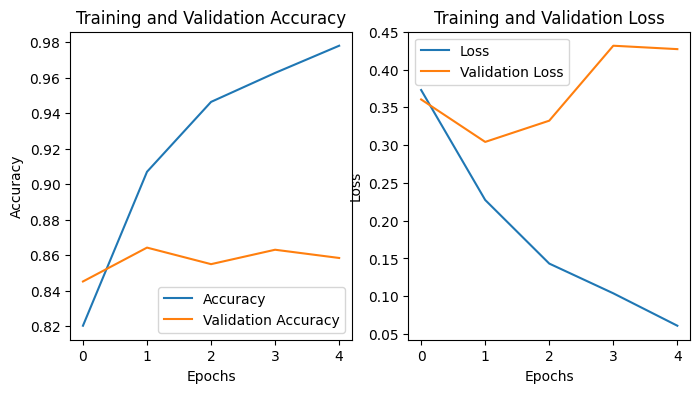

In [ ]:
# Plotting the accuracy and loss over time

# Training history
history_dict = history.history

# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Separating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()


**Inference:**

The model demonstrates effective learning from the training data, as indicated by the increasing training accuracy and decreasing training loss. However, the validation accuracy stabilizes after initial improvement, and the validation loss fluctuates slightly, suggesting that while the model learns well, its ability to generalize to new data does not continue to improve significantly after a few epochs. This pattern indicates potential overfitting, highlighting the need for techniques like regularization or early stopping to enhance generalization performance.

In [ ]:
# Sample text for prediction
sample_text = (
    '''The movie is awesome.'''
)


In [ ]:
#Tokenize the texts
tokenizer = Tokenizer()

In [ ]:
# Tokenize and pad the sample text

tokenizer.fit_on_texts([sample_text])
sequences = tokenizer.texts_to_sequences([sample_text])
padded_sequences = pad_sequences(sequences)
# Automatically determines maxlen based on the longest sequence



In [ ]:
predictions = model.predict(np.array([sample_text])) #predict_proba - probabilities - 0.5
print(*predictions[0])

1/1 [==============================] - 0s 21ms/step
2.1500754


In [ ]:
# Print the label based on the prediction
if predictions[0] > 0:
    print('The review is positive')
else:
    print('The review is negative')
# hyperparamter tuning

The review is positive


**End of Notebook**